In [3]:
# Load libraries
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [9]:
# Load and split data
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images/255, test_images/255

class_name = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

170498071/170498071 [==============================] - 116s 1us/step


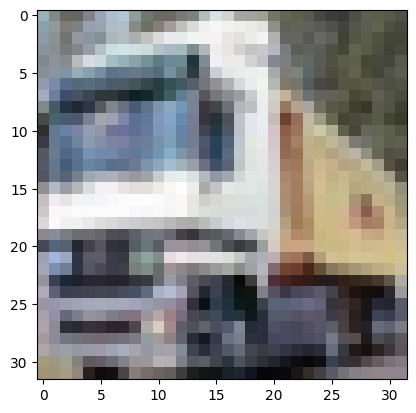

In [16]:
# Look image in dataset
plt.imshow(train_images[1])
plt.show()

In [42]:
# Build CNN model
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(10)
   
])  

In [46]:
# Model compile
model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])

# Model fit
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 37s 23ms/step - loss: 1.7119 - accuracy: 0.3987 - val_loss: 1.3948 - val_accuracy: 0.4888
Epoch 2/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.3046 - accuracy: 0.5323 - val_loss: 1.2580 - val_accuracy: 0.5468
Epoch 3/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.1462 - accuracy: 0.5950 - val_loss: 1.1056 - val_accuracy: 0.6095
Epoch 4/10
1563/1563 [==============================] - 35s 22ms/step - loss: 1.0518 - accuracy: 0.6308 - val_loss: 1.0431 - val_accuracy: 0.6322
Epoch 5/10
1563/1563 [==============================] - 34s 22ms/step - loss: 0.9877 - accuracy: 0.6538 - val_loss: 1.0078 - val_accuracy: 0.6469
Epoch 6/10
1563/1563 [==============================] - 37s 24ms/step - loss: 0.9345 - accuracy: 0.6732 - val_loss: 1.0161 - val_accuracy: 0.6433
Epoch 7/10
1563/1563 [==============================] - 35s 22ms/step - loss: 0.8940 - accuracy: 0.6876 - val_loss: 0.9634 -

In [47]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 1)
print(test_acc)

313/313 [==============================] - 2s 7ms/step - loss: 0.8875 - accuracy: 0.6941
0.694100022315979


In [48]:
predictions = model.predict(test_images) 

313/313 [==============================] - 2s 6ms/step


ship


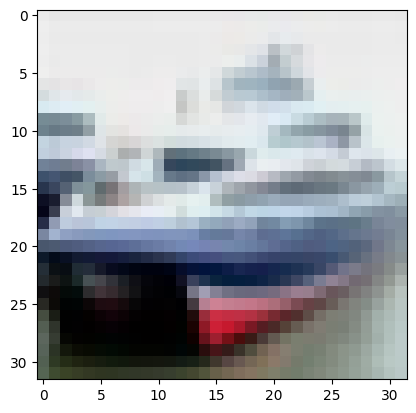

In [49]:
import numpy as np
plt.figure()
print(class_name[np.argmax(predictions[1])])
plt.imshow(test_images[1])
plt.show()